Scraping from http://dnd5e.wikidot.com/#toc0
simplifying: only scraping Spells. then will do classification.

In [678]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [679]:
#collecting info
url = "http://dnd5e.wikidot.com/spells"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

Scrapes levels

In [680]:
lraw = soup.find('ul', class_="yui-nav")
#print(lraw.text)

In [681]:
lsep = lraw.findAll('li')
#print(lsep)

In [682]:
levelsClean = [i.text.strip() for i in lsep]
#print (levelsClean)

Scrape Spells

In [683]:
spellData = soup.find('div', class_="yui-content")
#print(spellData)

In [684]:
levelData = spellData.findAll('table')

Setting up level lists

In [685]:
levlist = {}
for c in range(0,10):
    levlist["list"+str(c)] = levelData[c]
#print(levlist.keys())

Sets up headers
Sets up DataFrame

In [686]:
listHeadersRaw = list0.findAll("th")
listHeaders = [i.text.strip() for i in listHeadersRaw]
for c, i in enumerate(listHeaders, 0):
    globals()["header"+str(c)] = []

In [687]:
#gross but working simple
#dataframe init
dfs = []
for i in range(10):
    globals()["level"+str(i)] = pd.DataFrame()
    dfs.append(globals()["level"+str(i)])

Below: testing for automating spell, school, casting time, range, duration, components

In [688]:
#places data into header boxes
for i in range(10):
    curr = levlist["list"+str(i)]
    spellRaw = curr.findAll("td")
    for d in range(6):
        globals()["header"+str(d)] = []
    for c, k in enumerate(spellRaw, 0):
        match c%6:
            case 0:
                header0.append(k.text.strip())
               # print("Spell name: " + str())
            case 1:
                header1.append(k.text.strip())
               # print("School: " + str(i.text.strip()))
            case 2:
                header2.append(k.text.strip())
              #  print("Casting Time: " + str(i.text.strip()))
            case 3:
                header3.append(k.text.strip())
               # print("Range: " + str(i.text.strip()))
            case 4:
                header4.append(k.text.strip())
               #print("Duration: " + str(i.text.strip()))
            case 5:
                header5.append(k.text.strip())
                #print("Components: " + str(i.text.strip()))
    for j, header in enumerate(listHeaders, 0):
        #print(i, j)
        dfs[i].insert(j, header, globals()["header"+str(j)])

Testing grab spell webpage, and parse for effect, higher levels, classes

In [689]:
#collecting spell page data starting with 1 spell
currSpell = (level0["Spell Name"][0]).replace(" ", "-").replace("/", "-")
if(currSpell.split('-')[-1].startswith("(")):
    currSpell = currSpell[:-5]


In [692]:
#grabs curr spell page

spellUrl = "http://dnd5e.wikidot.com/spell:"+currSpell
spellPage = requests.get(spellUrl)
spellSoup = BeautifulSoup(spellPage.text, 'html')

#print(spellUrl)
#print(spellSoup)
#print(currSpell)

In [693]:
content = spellSoup.find("div", id="page-content").findAll("p")
#print(len(content))

logic for dynamically grabbing effects, higherlevels, spellLists

In [695]:
source = content[0]
spellList, hlevel
s = len(content)
for i in range(len(content)):
    if  content[-i].text.find("Spell Lists") != -1:
        s = s-i
        spellList = content[-i].text.strip().replace(",", "").split(" ")[2:]
    if content[-i].text.find("At Higher Levels.") != -1:
        s = s-i
        hlevel = content[-i].text.strip()
        break
if(s != 3):
    effect = " ".join(i.text.strip()+'\n' for i in content[3:s])   
else:
     effect = content[3].text.strip()   

#print(source)
#print(effect)
#print(hlevel)
#print(spellList)

Solved:
Current issue is that it doesn't conconate multiple paragraphs so need to search P for Spell Lists and Higher level if it exists, and then concat all paragraphs between uhhhh 3 and Spell/Higher Level Index

Below initializes columns with empty data
Idea: initialize all data as empty and then insert

In [696]:
level0["Effect"],level0["Higher Levels"], level0["Classes"]  = pd.Series(dtype='object'), pd.Series(dtype='object'), pd.Series(dtype='object')

In [697]:
#now time to automate the data entry for Cantrip table
for k, i in enumerate(level0["Spell Name"]):
    effect, hlevel, spellList = "", "",""
    currSpell = i.replace(" ", "-").replace("/", "-")
    if(currSpell.split('-')[-1].startswith("(")):
        currSpell = currSpell[:-5]
    #print(currSpell)
    spellUrl = "http://dnd5e.wikidot.com/spell:"+currSpell
    spellPage = requests.get(spellUrl)
    spellSoup = BeautifulSoup(spellPage.text, 'html')
    content = spellSoup.find("div", id="page-content").findAll("p")
    source = content[0].text
    spellList, hlevel
    s = len(content)
    for i in range(len(content)):
        if  content[-i].text.find("Spell Lists") != -1:
            s = s-i
            spellList = content[-i].text.strip().replace(",", "").split(" ")[2:]
        if content[-i].text.find("At Higher Levels.") != -1:
            s = s-i
            hlevel = content[-i].text.strip()
            break
    
    if(s != 3):
        effect = " ".join(i.text.strip()+'\n' for i in content[3:s])   
    else:
         effect = content[3].text.strip()      
    level0["Effect"][k] = effect
    level0["Higher Levels"][k] = hlevel
    level0["Classes"][k] = spellList

In [670]:
school = level0.groupby("School").size()
#print(school)

schoolFrame = school.reset_index().rename(columns={0:"freq"})
#schoolFrame

Issue: need visualization that joins the sets together

In [698]:
labels = [i for i in schoolFrame["School"]]
sizes = [i for i in schoolFrame["freq"]]
#print(labels)
#print(sizes)


([<matplotlib.patches.Wedge at 0x74df2e1f21d0>,
 [Text(1.080515976669981, 0.2061194414918628, 'Abjuration'),
  Text(0.7530018217768821, 0.8018654852284746, 'Conjuration'),
  Text(0.2061194541375137, 1.080515974257694, 'Divination'),
  Text(-0.20611942884621184, 1.0805159790822678, 'Enchantment'),
  Text(-1.0654414723751322, 0.2735588948345682, 'Evocation'),
  Text(-0.8475645778852776, -0.7011663756300294, 'Illusion'),
  Text(-0.5894094953465411, -0.928760704807937, 'Necromancy'),
  Text(-0.27355890730379684, -1.0654414691735783, 'Necromancy D'),
  Text(0.6465637233635882, -0.889918733160626, 'Transmutation'),
  Text(1.0978293949013356, -0.06906967272665815, 'Transmutation T')])

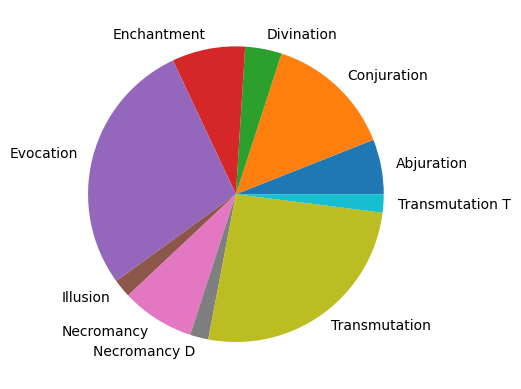

In [646]:
#gonna make a piechart
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [676]:
for i in dfs:
    i["Effect"],i["Higher Levels"], i["Classes"]  = pd.Series(dtype='object'), pd.Series(dtype='object'), pd.Series(dtype='object')
